# IMDB-sentiment Analysis Using Naive Bayes Classifier

Test classification is done for the purpose of finding tags or catagories of the text according to their contents. In this analysis, the data set is a collection of 50,000 reviews from IMDB. I have taken the process data from https://www.kaggle.com/lakshmi25npathi/sentiment-analysis-of-imdb-movie-reviews/data and orginal data is available in here http://ai.stanford.edu/~amaas/data/sentiment/. The purpose of this analysis was exploring the naive bayes classification with text data. 

# Import the data and explore the contents

In [1]:
# Read The data
import pandas as pd
import numpy as np
from sklearn.naive_bayes import MultinomialNB

In [27]:
# Import the data and see the data type

In [2]:
data=pd.read_csv('C:/Users/mxm5116/Desktop/Data Mining/IMDB Dataset.csv')
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [29]:
# Check the shape of the data
print(data.shape)

(50000, 2)


In [30]:
# Now lets, see the summary of the data set
data.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [31]:
# Check the positive and negative number of sentiment
data['sentiment'].value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

# a. Divide the dataset as train,and test¶ data sets

# First clear and normalized the data and divide again as normalized train,  and test data

# Now clean the text

In [3]:
# Import library
from bs4 import BeautifulSoup
import re,string,unicodedata
# Removing the html strips
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

In [4]:
# Remove the square brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

In [5]:
# Remoove the noisy text
def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    return text
#Apply function on review column
data['review']=data['review'].apply(denoise_text)

In [6]:
# Now remove special character and apply function for the review colums
def remove_special_characters(text, remove_digits=True):
    pattern=r'[^a-zA-z0-9\s]'
    text=re.sub(pattern,'',text)
    return text
data['review']=data['review'].apply(remove_special_characters)

In [7]:
# Streaming the text
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
def simple_stemmer(text):
    ps=nltk.porter.PorterStemmer()
    text= ' '.join([ps.stem(word) for word in text.split()])
    return text
#Apply function on review column
data['review']=data['review'].apply(simple_stemmer)

In [8]:
data.head()

,review,sentiment
0,one of the other review ha mention that after ...,positive
1,A wonder littl product the film techniqu is ve...,positive
2,I thought thi wa a wonder way to spend time on...,positive
3,basic there a famili where a littl boy jake th...,negative
4,petter mattei love in the time of money is a v...,positive


In [9]:
# Convert positive=1 and negative=0 as numeric
def posneg(x):
    if x=="negative":
        return 0
    elif x=="positive":
        return 1
    return x

filtered_score = data["sentiment"].map(posneg)
data["score"] = filtered_score

data.head()

,review,sentiment,score
0,one of the other review ha mention that after ...,positive,1
1,A wonder littl product the film techniqu is ve...,positive,1
2,I thought thi wa a wonder way to spend time on...,positive,1
3,basic there a famili where a littl boy jake th...,negative,0
4,petter mattei love in the time of money is a v...,positive,1


In [10]:
# Data Preparation for the model
from sklearn.model_selection import KFold, cross_val_score, train_test_split
import random
X = data['review'].values
y = data['sentiment'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(40000,)
(10000,)
(40000,)
(10000,)


# b.	Build a vocabulary as list. 
	     [‘the’ ‘I’ ‘happy’ … ] 
# You may omit rare words for example if the occurrence is less than five times
#  A reverse index as the key value might be handy
    {“the”: 0, “I”:1, “happy”:2 , … }


In [73]:
train_voca='.'.join(X_train)

In [72]:
test_voca='.'.join(X_test)

In [13]:
import nltk
from sklearn.feature_extraction.text import CountVectorizer
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mxm5116\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [14]:
foovec = CountVectorizer(min_df=1, tokenizer=nltk.word_tokenize)
train_counts = foovec.fit_transform(X_train)
print(train_counts)
train_counts.shape

  (0, 136293)	8
  (0, 150904)	3
  (0, 67766)	5
  (0, 75135)	1
  (0, 11562)	1
  (0, 92885)	1
  (0, 41874)	3
  (0, 136505)	23
  (0, 84039)	3
  (0, 50335)	1
  (0, 119747)	1
  (0, 85233)	1
  (0, 133713)	1
  (0, 8639)	11
  (0, 56257)	1
  (0, 85626)	1
  (0, 103934)	1
  (0, 3345)	1
  (0, 88547)	1
  (0, 29843)	1
  (0, 7852)	1
  (0, 129385)	2
  (0, 145433)	1
  (0, 151082)	1
  (0, 155151)	2
  :	:
  (39999, 4780)	3
  (39999, 110500)	1
  (39999, 25078)	1
  (39999, 140945)	1
  (39999, 69211)	1
  (39999, 35608)	1
  (39999, 73389)	1
  (39999, 21410)	1
  (39999, 101470)	1
  (39999, 37086)	1
  (39999, 138509)	1
  (39999, 64282)	1
  (39999, 53674)	1
  (39999, 31076)	1
  (39999, 70371)	1
  (39999, 48701)	1
  (39999, 108453)	1
  (39999, 118323)	1
  (39999, 47309)	1
  (39999, 26024)	1
  (39999, 85408)	1
  (39999, 135801)	1
  (39999, 59687)	1
  (39999, 37944)	1
  (39999, 29741)	1


(40000, 156180)

In [76]:
foovec.vocabulary_

SyntaxError: invalid syntax (<ipython-input-76-8dd641b240c4>, line 1)

In [16]:
from os import listdir
from collections import Counter
# print the size of the vocab
print(len(foovec.vocabulary_))


156180


In [78]:
# You may omit rare words for example if the occurrence is less than five times
# keep tokens with a min occurrence
min_occurane = 5
tokens = [k for k,c in foovec.vocabulary_.items() if c >= min_occurane]
print(tokens[1:1000])


['what', 'i', 'kept', 'ask', 'myself', 'dure', 'the', 'mani', 'fight', 'scream', 'match', 'swear', 'and', 'gener', 'mayhem', 'permeat', '84', 'minut', 'comparison', 'also', 'stand', 'up', 'when', 'you', 'think', 'of', 'onedimension', 'charact', 'who', 'have', 'so', 'littl', 'depth', 'it', 'is', 'virtual', 'imposs', 'to', 'care', 'happen', 'them', 'they', 'are', 'just', 'badli', 'written', 'cypher', 'for', 'director', 'hang', 'hi', 'multicultur', 'belief', 'on', 'a', 'topic', 'ha', 'been', 'done', 'much', 'better', 'in', 'other', 'drama', 'both', 'tv', 'cinemai', 'must', 'confess', 'im', 'not', 'realli', 'one', 'spot', 'bad', 'perform', 'film', 'but', 'be', 'said', 'nichola', 'burley', 'as', 'heroin', 'slutti', 'best', 'friend', 'wasim', 'zakir', 'nasti', 'bulli', 'brother', 'were', 'absolut', 'terribl', 'dont', 'know', 'act', 'school', 'graduat', 'from', 'if', 'wa', 'id', 'appli', 'full', 'refund', 'post', 'hast', 'onli', 'samina', 'awan', 'lead', 'role', 'manag', 'impress', 'cast', 's

In [18]:
print(len(tokens))

156175


# Before clearing the rare word, total number of word was 156180 and after removing it, now total number of word is 156175, which indicates that we have only 5 rare words or miss spelled word. As the number is very less, so it will not affect our analysis.

# c.	Calculate the following probability
	Probability of the occurrence
•	P[“the”] = num of documents containing ‘the’ / num of all documents
	Conditional probability based on the sentiment



In [19]:
words=["the"]
sentences = X_train
count=0
for sentence in sentences :
     for word in words :
           if word in sentence :
            count=count+1
            #print(count)
            #print(count)
num_of_documents_containing_the=count
print(num_of_documents_containing_the)

39815


In [20]:
num_of_all_documents=40000
print(num_of_all_documents)

40000


In [21]:
Probability_of_the=num_of_documents_containing_the/num_of_all_documents
print(Probability_of_the)

0.995375


# •	P[“the” | Positive]  = # of positive documents containing “the” / num of all positive review documents

In [22]:
# Now take the positive sentiment data from training set
train_data=data[:4000]
positive_docs=train_data.loc[train_data['sentiment']!=0]
positive_docs.head()

,review,sentiment,score
0,one of the other review ha mention that after ...,positive,1
1,A wonder littl product the film techniqu is ve...,positive,1
2,I thought thi wa a wonder way to spend time on...,positive,1
3,basic there a famili where a littl boy jake th...,negative,0
4,petter mattei love in the time of money is a v...,positive,1


In [23]:
# make the list of positive sentiment
train_pos_reviews=positive_docs['review']
train_pos_voca=train_pos_reviews.values.tolist()
train_pos_voca[1:5]

['A wonder littl product the film techniqu is veri unassum veri oldtimebbc fashion and give a comfort and sometim discomfort sens of realism to the entir piec the actor are extrem well chosen michael sheen not onli ha got all the polari but he ha all the voic down pat too you can truli see the seamless edit guid by the refer to william diari entri not onli is it well worth the watch but it is a terrificli written and perform piec A master product about one of the great master of comedi and hi life the realism realli come home with the littl thing the fantasi of the guard which rather than use the tradit dream techniqu remain solid then disappear It play on our knowledg and our sens particularli with the scene concern orton and halliwel and the set particularli of their flat with halliwel mural decor everi surfac are terribl well done',
 'I thought thi wa a wonder way to spend time on a too hot summer weekend sit in the air condit theater and watch a lightheart comedi the plot is simpli

In [74]:
# Join the positive sentiment with single dot
train_pos_voca='.'.join(train_pos_voca)

In [25]:
# Now calculate the number of positive documents having the
words=["the"]
sentences = train_pos_voca
count=0
for sentence in sentences :
     for word in words :
           if word in sentence :
            count=count+1
            #print(count)
            #print(count)
num_of_pos_documents_containing_the=count
print(num_of_pos_documents_containing_the)

3978


In [26]:
# Find the totl positive documents in training data set
num_of_all_pos_documents=positive_docs['review'].count()
print(num_of_all_pos_documents)

4000


In [27]:
# Now calculate P[“the” | Positive]  = # of positive documents containing “the” / num of all positive review documents
probability_0f_the_in_positive_docs=num_of_pos_documents_containing_the/num_of_all_pos_documents
print(probability_0f_the_in_positive_docs)

0.9945


# d.	Calculate accuracy using dev dataset 
	# Conduct five fold cross validation


In [65]:
# Convert the data in vector fpormate
tf_idf_vect = TfidfVectorizer(ngram_range=(1,2))
tf_idf_train = tf_idf_vect.fit_transform(X_train)
tf_idf_test = tf_idf_vect.transform(X_test)

alpha_range = list(np.arange(0,10,1))
len(alpha_range)

10

In [66]:
# take different values of alpha in cross validation  and finding the accuracy score
from sklearn.naive_bayes import MultinomialNB

alpha_scores=[]

for a in alpha_range:
    clf = MultinomialNB(alpha=a)
    scores = cross_val_score(clf, tf_idf_train, y_train, cv=5, scoring='accuracy')
    alpha_scores.append(scores.mean())
    print(a,scores.mean())

C:\Users\mxm5116\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
C:\Users\mxm5116\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
C:\Users\mxm5116\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
C:\Users\mxm5116\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
C:\Users\mxm5116\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


0 0.8233
1 0.8845749999999999
2 0.879425
3 0.8753749999999998
4 0.8727500000000001
5 0.8703
6 0.8679499999999999
7 0.86595
8 0.8638
9 0.86205


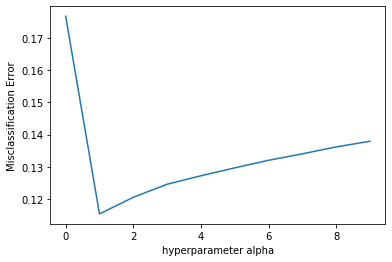

In [67]:
# Plot b/w misclassification error and CV mean score.
import matplotlib.pyplot as plt

MSE = [1 - x for x in alpha_scores]


optimal_alpha_bnb = alpha_range[MSE.index(min(MSE))]

# plot misclassification error vs alpha
plt.plot(alpha_range, MSE)

plt.xlabel('hyperparameter alpha')
plt.ylabel('Misclassification Error')
plt.show()

In [68]:
optimal_alpha_bnb

# For alpha =1, we have got minimum misscalculation error

1

# e.	Do following experiments
	Compare the effect of Smoothing
	Derive Top 10 words that predicts positive and negative class 
 •	P[Positive| word] 


In [ ]:
# Effects of non-smoothing and smoothing 

# We have already got the effects of smoothing and non-smoothing. When we have considered alpha=0 (non-smoothing), we got the accuracy 82.33% whereas with smoothing our accuacy is always greater than non-smoothing conditions. We have got best smoothing parapmeter alpha=1 with hoighest accuracy 88.46%

In [37]:
# Now lets see the highest positive and negative words that has highest sentiment prediction capacity
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mxm5116\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [43]:
# Now we will remove stop words as it does not carry significant meaning and will store positive and negative word for selections
stop = set(stopwords.words('english')) 
sno = nltk.stem.SnowballStemmer('english') 
def cleanhtml(sentence): 
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', sentence)
    return cleantext
def cleanpunc(sentence): 
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    return  cleaned
i=0
str1=' '
final_string=[]
all_positive_words=[] 
all_negative_words=[] 
s=''
for sent in data['review'].values:
    filtered_sentence=[]
    sent=cleanhtml(sent) 
    for w in sent.split():
        for cleaned_words in cleanpunc(w).split():
            if((cleaned_words.isalpha()) & (len(cleaned_words)>2)):    
                if(cleaned_words.lower() not in stop):
                    s=(sno.stem(cleaned_words.lower())).encode('utf8')
                    filtered_sentence.append(s)
                    if (data['score'].values)[i] == 1: 
                        all_positive_words.append(s) 
                    if(data['score'].values)[i] == 0:
                        all_negative_words.append(s) 
                else:
                    continue
            else:
                continue 
    
    str1 = b" ".join(filtered_sentence) 
    
    final_string.append(str1)
    i+=1

In [44]:
total_positive_words = len(all_positive_words)
total_negative_words = len(all_negative_words)
print(total_positive_words)
print(total_negative_words)

3062885
3002812


In [45]:
import random
apw = random.sample(all_positive_words, 10000)
anw = random.sample(all_negative_words, 10000)
freq_negative_words = {x:anw.count(x) for x in anw}
freq_positive_words = {x:apw.count(x) for x in apw}

In [ ]:
#Lets see positive sentiment first

In [46]:
lst=[]
for key in freq_positive_words:
    prob = freq_positive_words[key]/total_positive_words
    lst.append([key,prob])
table_positive = pd.DataFrame(lst,columns=['positive_words','probability'])
table_positive = table_positive.sort_values('probability', axis=0, ascending=False, inplace=False, kind='quicksort', na_position='last')
table_positive.head(20)

,positive_words,probability
16,b'thi',0.000070
2,b'film',0.000049
115,b'movi',0.000047
127,b'like',0.000027
52,b'one',0.000026
341,b'stori',0.000017
263,b'see',0.000017
49,b'time',0.000016
283,b'scene',0.000016
201,b'make',0.000016


In [47]:
from operator import itemgetter
posi={}
i=0
for key, value in sorted(freq_positive_words.items(), key = itemgetter(1), reverse = True):
    if(i>10):
        break
    posi[key]=value
    i+=1
posi

{b'thi': 214,
 b'film': 149,
 b'movi': 143,
 b'like': 83,
 b'one': 80,
 b'stori': 52,
 b'see': 51,
 b'time': 50,
 b'make': 48,
 b'scene': 48,
 b'veri': 47}

Top 10 words that predicts positive sentiment


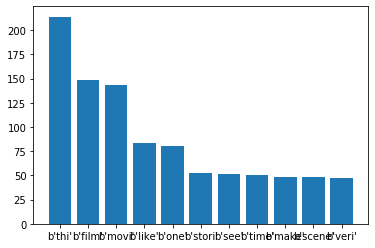

In [48]:
plt.bar(range(len(posi)), list(posi.values()), align='center')
plt.xticks(range(len(posi)), list(posi.keys()))

print("Top 10 words that predicts positive sentiment")
plt.show()

In [49]:
# Now lets see top 10 negative sentiment words
lst=[]
for key in freq_negative_words:
    prob = freq_negative_words[key]/total_negative_words
    lst.append([key,prob])
table_negative = pd.DataFrame(lst,columns=['negative_words','probability'])
table_negative = table_negative.sort_values('probability', axis=0, ascending=False, inplace=False, kind='quicksort', na_position='last')
table_negative.head(20)

,negative_words,probability
30,b'thi',0.000084
142,b'movi',0.000056
17,b'film',0.000041
16,b'like',0.000029
250,b'one',0.000026
2,b'even',0.000021
177,b'charact',0.000017
0,b'get',0.000016
15,b'watch',0.000016
56,b'look',0.000014


In [50]:
nega={}
i=0
for key, value in sorted(freq_negative_words.items(), key = itemgetter(1), reverse = True):
    if(i>10):
        break
    nega[key]=value
    i+=1
nega

{b'thi': 253,
 b'movi': 168,
 b'film': 124,
 b'like': 88,
 b'one': 78,
 b'even': 63,
 b'charact': 51,
 b'get': 49,
 b'watch': 47,
 b'ani': 41,
 b'would': 41}

Top 10 words that predicts negative sentiment


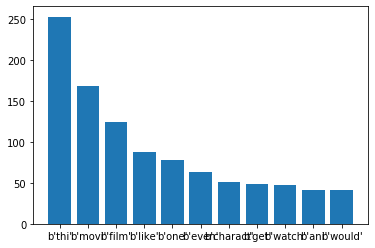

In [51]:
plt.bar(range(len(nega)), list(nega.values()), align='center')
plt.xticks(range(len(nega)), list(nega.keys()))

print("Top 10 words that predicts negative sentiment")
plt.show()

# f.	Using the test dataset
	Use the optimal hyperparameters you found in the step e, and use it to calculate the final accuracy.  


In [69]:
optimal_alpha_bnb

# For alpha =1, we have got minimum misscalculation error

1

In [54]:
# Now lets see Naive bayes model
clf = MultinomialNB(alpha=1)
clf.fit(tf_idf_train,y_train)

MultinomialNB(alpha=1, class_prior=None, fit_prior=True)

In [55]:
y_pred_test = clf.predict(tf_idf_test)

In [56]:
from sklearn.metrics import accuracy_score
from collections import Counter
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred_test, normalize=True) * float(100)
print('\n****Test accuracy is',(acc))


****Test accuracy is 88.98


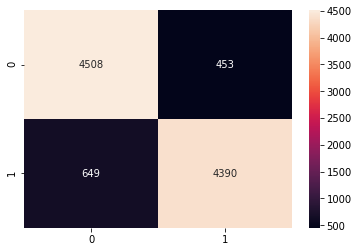

In [57]:
# Now lets see the confusion matrix to see the performance in visualization of classification algorithm
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn import metrics
cm_test = confusion_matrix(y_test,y_pred_test)
cm_test
sns.heatmap(cm_test,annot=True,fmt='d')

In [58]:
# Now lets see the train acuracy
y_pred_train = clf.predict(tf_idf_train)
acc = accuracy_score(y_train, y_pred_train, normalize=True) * float(100)
print('\n****Train accuracy is %d%%' % (acc))


****Train accuracy is 96%


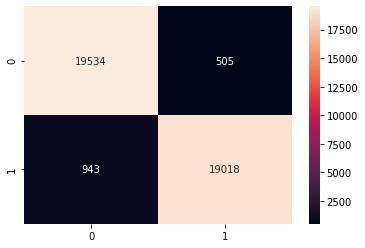

In [59]:
cm_train = confusion_matrix(y_train,y_pred_train)
cm_train
sns.heatmap(cm_train,annot=True,fmt='d')

 # With best hyperparameter=1, wh have got test accuracy =88.98% and train accuracy=96% which is good. If we see the confusion matrix, then we can see clear visualization of correct predictions and some wrong predictions.

# References
01. https://www.kaggle.com/lakshmi25npathi/sentiment-analysis-of-imdb-movie-reviews
02. https://towardsdatascience.com/sentiment-analysis-with-python-part-1-5ce197074184
03. https://www.dataquest.io/blog/naive-bayes-tutorial/
04. https://levelup.gitconnected.com/movie-review-sentiment-analysis-with-naive-bayes-machine-learning-from-scratch-part-v-7bb869391bab
05. https://medium.com/@krsatyam1996/imdb-movie-review-polarity-using-naive-bayes-classifier-9f92c13efa2d
